In [1]:
import numpy as np

Letra A

In [2]:
### Pontos Conhecidos

x = [0, 10, 20] # distância
y = [0, 6, 4] # altitude

In [3]:
### Funções a serem utilizadas:


## Resolução de sistemas lineares de forma direta:

def solucao_direta(A, B):
    n = len(A)

    # Criando um sistema triangular com o método da Eliminação de Gauss
    for k in range(0, n-1):
        for i in range(k+1, n):
            m = (A[i][k])/(A[k][k])

            for j in range(k, n):
                A[i][j] = A[i][j] - m*A[k][j]
            B[i] = B[i] - m*B[k]


    # Resolvendo o sistema triangular pelo método da substituição retroativa
    x = []

    for i in range(0, n):
        x.append(0)

    x[n-1] = B[n-1]/A[n-1][n-1]

    c = 1
    
    for i in range(n-2, -1, -1):
        soma = 0
        c += 1
        for j in range(n-1, i, -1):
            soma += (A[i][j]*x[j])
        x[n-c] = (B[i] - soma)/(A[i][i])

    return x # retorna o vetor solução do sistema


### Funções de Interpolação Polinomial:

def interpolacao(x, fx): # Argumentos: vetores com os valores de x e f(x)
    n = len(x)
    A = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            A[i][j] = x[i]**j

    B = np.copy(fx)

    coef = solucao_direta(A, B)


    return coef  # Retorna os coeficientes "a" do polinômio Pn(x)


def Pn(x, a): ## Retorna um valor correspondente a Pn(x) para um polinômio com os coeficientes do vetor "a"
    n = len(a)

    Pnx = 0
    for j in range(0, n):
        Pnx += a[j]*(x**j)
        
    
    return Pnx

Como temos três pontos conhecidos, e a trajetória do projétil se assemelha a uma parábola, obtemos um polinômio interpolador de segunda ordem, ou seja, da forma: Pn(x) = a[0] + a[1]*x + a[2]*(x**2)

In [4]:
### Calculando a altitude do Projétil a 5 metros do lançamento:

coeficientes = interpolacao(x, y)
altitude = Pn(5, coeficientes)

print(f'A 5 metros do lançamento, o projétil terá altitude de {altitude} metros')

A 5 metros do lançamento, o projétil terá altitude de 4.0 metros


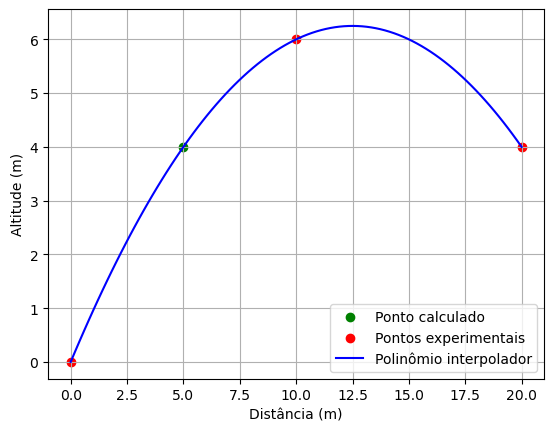

In [5]:
### Gerando um gráfico com a trajetória descrita pelo polinômio interpolador:

import matplotlib.pyplot as plt

xm = np.linspace(x[0], x[-1], 100) ## cria uma "malha fina" de 100 pontos do primeiro x ao último

fi = []
for i in range(0, len(xm)):
    fi.append(Pn(xm[i], coeficientes)) 

plt.xlabel('Distância (m)')
plt.ylabel('Altitude (m)')
plt.scatter(5, altitude, color='green', label='Ponto calculado')
plt.scatter(x, y, color='red', label='Pontos experimentais')
plt.plot(xm, fi, color='blue', label='Polinômio interpolador')
plt.legend()
plt.grid()
plt.show()

Letra B

In [6]:
### Montando as matrizes do sistema linear deduzido na foto "letraB" presente na pasta desta questão

g = 9.81 #m/s^2

A = [[g*100/2, -10],
     [g*400/2, -20]]
B = [-6, -4]


### Resolvendo o sistema linear de forma direta para obter a1 e a2:

a = solucao_direta(A, B)
print(f'a1 = {a[0]}')
print(f'a2 = {a[1]}')



a1 = 0.00815494393476045
a2 = 1.0


In [7]:
### Conforme o raciocínio, a2 (ou a[1]) corresponde à tangente do ângulo de lançamento, logo basta descobrir seu arco tangente para encontrar o ângulo:

angulo = np.arctan(a[1])
print(f'O angulo theta é: {np.degrees(angulo):.2f} graus.')


### Analogamente podemos encontrar a Velocidade inicial v0 a partir de a1 (ou a[0]):

v0 = np.sqrt(1/(a[0]*np.cos(angulo)**2))
print(f'A velocidade v0 é: {v0:.2f} m/s.')

O angulo theta é: 45.00 graus.
A velocidade v0 é: 15.66 m/s.
